# 1 Criminal investigation

## 1.1 Introduction

## 1.2 Most and least frequent outgoing numbers

### 1.2.1 Identify 3 numbers with most counts of outgoing calls 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("phone_data.xlsx")
df.head()

,Date,Start time,From city,To city,Number called (to/from),Call type,Duration,Grand Total
0,10-14-2019,12:53:34 PM,INCOMING ON,TORONTO ON,Unknown caller,Incoming,1,0
1,10-13-2019,11:47:28 AM,TORONTO ON,TORONTO ON,A_1,Outgoing,7,0
2,10-13-2019,11:46:53 AM,TORONTO ON,TORONTO ON,A_2,Outgoing,1,0
3,10-13-2019,11:46:15 AM,TORONTO ON,TORONTO ON,A_2,Outgoing,1,0
4,10-11-2019,07:03:08 PM,TORONTO ON,TORONTO ON,A_3,Outgoing,37,0


In [3]:
# filter out outgoing calls
# group by number called and count number of calls 
a = pd.DataFrame(df[df['Call type']=='Outgoing'].groupby('Number called (to/from)')['Call type'].count())

In [4]:
# find 3 numbers with most outgoing calls
pd.DataFrame(a['Call type'].nlargest(3)).rename(columns = {'Call type':'Count'})

,Count
Number called (to/from),
A_1,111
A_5,48
B_3,28


**The most three outgoing call numbers are A_1, A_5 and B_3.**

### 1.2.2 Identify numbers with least count of outgoing calls

In [5]:
# identify all numbers with least outgoing calls
a[a['Call type'] == a['Call type'].min()]

,Call type
Number called (to/from),
B_5,1
C_1,1
C_3,1
D_1,1
D_2,1
D_5,1
E_4,1
E_5,1
F_1,1


**The numbers with least outgoing calls are B_5, C_1, C_3, D_1, D_2, D_5, E_4, E_5, F_1, F_2, F_3, F_4, F_5 and G_2.** 

## 1.3 Highest and lowest total duration of outgoing calls

### 1.3.1 Identify 3 numbers with highest total duration of outgoing calls

In [6]:
# filter out outgoing calls
# group by number called and sum duration
b = pd.DataFrame(df[df['Call type']=='Outgoing'].groupby('Number called (to/from)')['Duration'].sum())

In [7]:
# find 3 numbers with highest duration
pd.DataFrame(b['Duration'].nlargest(3))

,Duration
Number called (to/from),
A_1,1146
A_5,427
A_4,96


### Identify numbers with lowest total duration of outgoing calls

In [8]:
b[b['Duration'] == b['Duration'].min()]

,Duration
Number called (to/from),
C_1,1
D_5,1
E_4,1
E_5,1


## 1.4 Location of outgoing calls

### 1.4.1 Number of counts for every location of outgoing calls

In [9]:
# from city
c = pd.DataFrame(df[df['Call type']=='Outgoing'].groupby('From city')['From city'].count())

In [10]:
c.rename(columns={'From city':'Count'})

,Count
From city,
CLAREMONT ON,1
NEWMARKET ON,2
TORONTO ON,244


In [11]:
# to city
c = pd.DataFrame(df[df['Call type']=='Outgoing'].groupby('To city')['To city'].count())

In [12]:
c.rename(columns={'To city':'Count'})

,Count
To city,
800 SERV SERV 800 ON,1
866 SERV SERV 866 ON,1
877 SERV SERV 877 ON,1
888 SERV SERV 888 ON,1
AURORA ON,1
NEWMARKET ON,1
OAK RIDGES ON,28
RICHMONDHL ON,10
STOUFFVL ON,1


## 1.5 Incoming and Outgoing calls pattern

### 1.5.1 Calculate total duration of incoming and outgoing calls per month

In [13]:
# convert to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [14]:
# extract month
df['Month'] = df['Date'].dt.month

In [15]:
d = pd.pivot_table(df, values='Duration', index=['Month'],\
                       columns=['Call type'],aggfunc=np.sum)
d

Call type,Incoming,Outgoing
Month,,
7,84,190
8,54,281
9,244,714
10,63,621
11,87,196


### 1.5.2 Plot results

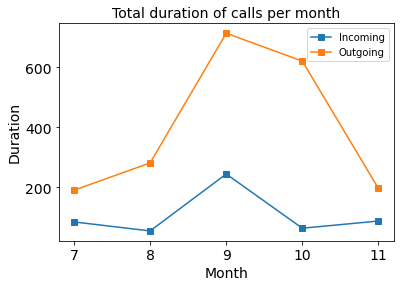

In [16]:
fig = plt.figure()
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.plot(d.index, d, '-s')
plt.title('Total duration of calls per month', fontsize=14)
plt.legend(d.columns, loc='best')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Duration', fontsize=14)
plt.show()

### 1.5.3 Determine phone line activity

I think it was used like for criminal activities. From the above plot, we observed much longer duration used in Sepetmber and October for both outgoing and incoming calls. It is suspect that it is used for other purposes than normal daily use, and that might be for some crimial activities. 

## 1.6 Distribution of calls

In [17]:
# rename columns
a.rename(columns = {'Call type':'Count'}, inplace = True)

In [18]:
# sort values
a.sort_values(by = 'Count', ascending = False, inplace = True)

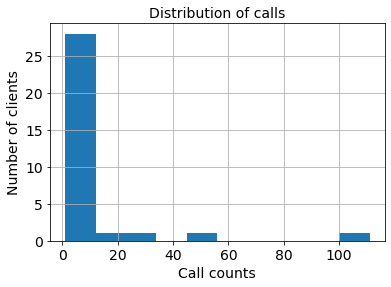

In [19]:
a.hist()
plt.xlabel('Call counts', fontsize=14)
plt.ylabel('Number of clients', fontsize=14)
plt.title('Distribution of calls', fontsize=14)
plt.show()

# 2 The ergodicity problem in economics

## 2.3 Coding the problem

### 2.3.1 Generate a dataframe

In [20]:
df = pd.DataFrame(np.random.rand(100,100))
df = df.add_prefix('prob_')
df

,prob_0,prob_1,prob_2,prob_3,prob_4,prob_5,prob_6,prob_7,prob_8,prob_9,...,prob_90,prob_91,prob_92,prob_93,prob_94,prob_95,prob_96,prob_97,prob_98,prob_99
0,0.981635,0.967604,0.357708,0.221521,0.769735,0.556321,0.725731,0.740410,0.435703,0.845268,...,0.054093,0.751913,0.302730,0.473038,0.068006,0.436415,0.407514,0.771048,0.974703,0.606940
1,0.835749,0.266878,0.731116,0.384888,0.096324,0.546445,0.134129,0.914512,0.215540,0.504547,...,0.299476,0.913882,0.323020,0.204018,0.716119,0.092643,0.487941,0.195478,0.996205,0.948270
2,0.568018,0.302208,0.583428,0.048280,0.716950,0.228234,0.547783,0.715966,0.335036,0.671866,...,0.123116,0.568566,0.155612,0.824657,0.437633,0.961344,0.188590,0.700354,0.771523,0.281652
3,0.227399,0.681647,0.911347,0.744812,0.643497,0.806485,0.903134,0.706149,0.925938,0.345047,...,0.016830,0.420686,0.211192,0.466470,0.980110,0.640829,0.002901,0.498758,0.864875,0.826996
4,0.681380,0.475788,0.807534,0.389769,0.790539,0.424687,0.026360,0.145970,0.216335,0.912918,...,0.447664,0.917460,0.116578,0.779816,0.158767,0.608916,0.227578,0.520403,0.114644,0.993750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.112970,0.733313,0.272552,0.643160,0.351412,0.876271,0.889523,0.288404,0.984828,0.751986,...,0.151180,0.488146,0.178374,0.473534,0.427943,0.449915,0.830104,0.259220,0.968969,0.694593
96,0.073076,0.921428,0.917565,0.383377,0.971278,0.101955,0.313042,0.742949,0.193818,0.975917,...,0.165605,0.190585,0.343057,0.206627,0.778796,0.870270,0.468523,0.727151,0.863679,0.089888
97,0.390949,0.866622,0.415297,0.628886,0.793865,0.158943,0.731085,0.601981,0.134363,0.135671,...,0.206371,0.480115,0.948574,0.507632,0.212050,0.636093,0.160427,0.713721,0.813644,0.037015
98,0.569123,0.711395,0.194466,0.529996,0.180002,0.961579,0.269996,0.433000,0.296487,0.820480,...,0.592652,0.368924,0.255226,0.458951,0.094607,0.287893,0.202429,0.279783,0.105827,0.280286


### 2.3.2 Initialize additional w columns

In [21]:
for x in range(0,100):
    df['balance_'+str(x)] = 100 * np.ones(100)  

In [22]:
df

,prob_0,prob_1,prob_2,prob_3,prob_4,prob_5,prob_6,prob_7,prob_8,prob_9,...,balance_90,balance_91,balance_92,balance_93,balance_94,balance_95,balance_96,balance_97,balance_98,balance_99
0,0.981635,0.967604,0.357708,0.221521,0.769735,0.556321,0.725731,0.740410,0.435703,0.845268,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
1,0.835749,0.266878,0.731116,0.384888,0.096324,0.546445,0.134129,0.914512,0.215540,0.504547,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
2,0.568018,0.302208,0.583428,0.048280,0.716950,0.228234,0.547783,0.715966,0.335036,0.671866,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
3,0.227399,0.681647,0.911347,0.744812,0.643497,0.806485,0.903134,0.706149,0.925938,0.345047,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
4,0.681380,0.475788,0.807534,0.389769,0.790539,0.424687,0.026360,0.145970,0.216335,0.912918,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.112970,0.733313,0.272552,0.643160,0.351412,0.876271,0.889523,0.288404,0.984828,0.751986,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
96,0.073076,0.921428,0.917565,0.383377,0.971278,0.101955,0.313042,0.742949,0.193818,0.975917,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
97,0.390949,0.866622,0.415297,0.628886,0.793865,0.158943,0.731085,0.601981,0.134363,0.135671,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
98,0.569123,0.711395,0.194466,0.529996,0.180002,0.961579,0.269996,0.433000,0.296487,0.820480,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0


### 2.3.3 Create a two-level loop

In [23]:
for x in range(0,100):
    for i in range(1,100):
        if df['prob_'+str(x)][i-1] >=0.5:   
            df['balance_'+str(x)][i] = 1.5 * df['balance_'+str(x)][i-1]
        else: 
            df['balance_'+str(x)][i] = 0.6 * df['balance_'+str(x)][i-1]

In [24]:
df

,prob_0,prob_1,prob_2,prob_3,prob_4,prob_5,prob_6,prob_7,prob_8,prob_9,...,balance_90,balance_91,balance_92,balance_93,balance_94,balance_95,balance_96,balance_97,balance_98,balance_99
0,0.981635,0.967604,0.357708,0.221521,0.769735,0.556321,0.725731,0.740410,0.435703,0.845268,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,0.835749,0.266878,0.731116,0.384888,0.096324,0.546445,0.134129,0.914512,0.215540,0.504547,...,60.000000,150.000000,60.000000,60.000000,60.000000,60.000000,60.000000,150.000000,150.000000,150.000000
2,0.568018,0.302208,0.583428,0.048280,0.716950,0.228234,0.547783,0.715966,0.335036,0.671866,...,36.000000,225.000000,36.000000,36.000000,90.000000,36.000000,36.000000,90.000000,225.000000,225.000000
3,0.227399,0.681647,0.911347,0.744812,0.643497,0.806485,0.903134,0.706149,0.925938,0.345047,...,21.600000,337.500000,21.600000,54.000000,54.000000,54.000000,21.600000,135.000000,337.500000,135.000000
4,0.681380,0.475788,0.807534,0.389769,0.790539,0.424687,0.026360,0.145970,0.216335,0.912918,...,12.960000,202.500000,12.960000,32.400000,81.000000,81.000000,12.960000,81.000000,506.250000,202.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.112970,0.733313,0.272552,0.643160,0.351412,0.876271,0.889523,0.288404,0.984828,0.751986,...,0.001737,0.010859,0.001737,0.000111,258.898333,0.424179,6.627797,103.559333,16.569493,6.627797
96,0.073076,0.921428,0.917565,0.383377,0.971278,0.101955,0.313042,0.742949,0.193818,0.975917,...,0.001042,0.006515,0.001042,0.000067,155.339000,0.254507,9.941696,62.135600,24.854240,9.941696
97,0.390949,0.866622,0.415297,0.628886,0.793865,0.158943,0.731085,0.601981,0.134363,0.135671,...,0.000625,0.003909,0.000625,0.000040,233.008500,0.381761,5.965018,93.203400,37.281360,5.965018
98,0.569123,0.711395,0.194466,0.529996,0.180002,0.961579,0.269996,0.433000,0.296487,0.820480,...,0.000375,0.002346,0.000938,0.000060,139.805100,0.572642,3.579011,139.805100,55.922040,3.579011


### 2.3.4 Plot the time trajectories

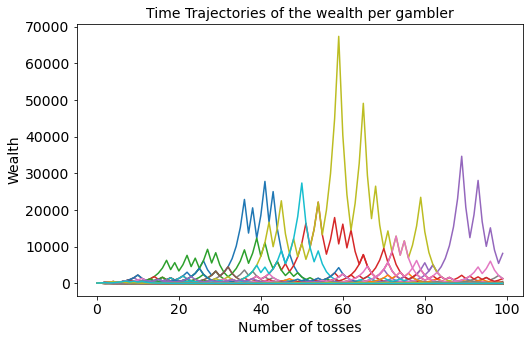

In [25]:
fig = plt.figure(figsize=(8,5))
for x in range(100,200):
    plt.plot(df.index, df.iloc[:,x].values)
plt.title('Time Trajectories of the wealth per gambler', fontsize=14)
plt.xlabel('Number of tosses', fontsize=14)
plt.ylabel('Wealth', fontsize=14)
plt.show()

In [26]:
def count_gambler(df,n):
    count = 0
    for x in range(0,100):
        if df['balance_'+str(x)][n-1] > 100:
            count = count + 1
        else: 
            pass
    return count

In [27]:
print('There are %d gamblers have more than 100$ at t = 100' %count_gambler(df,100))

There are 10 gamblers have more than 100$ at t = 100


In [28]:
# repeat 1-3 for N = 1000
df_new = pd.DataFrame(np.random.rand(1000,100))
df_new = df_new.add_prefix('prob_')

for x in range(0,100):
    df_new['balance_'+str(x)] = 100 * np.ones(1000) 

for x in range(0,100):
    for i in range(1,1000):
        if df_new['prob_'+str(x)][i-1] >= 0.5:   
            df_new['balance_'+str(x)][i] = 1.5 * df_new['balance_'+str(x)][i-1]
        else: 
            df_new['balance_'+str(x)][i] = 0.6 * df_new['balance_'+str(x)][i-1]

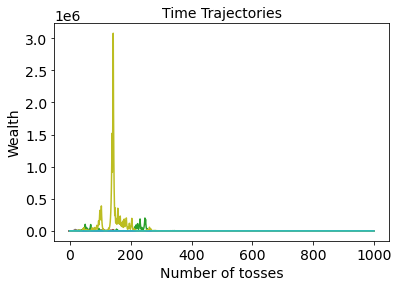

In [29]:
fig = plt.figure()
for x in range(100,200):
    plt.plot(df_new.index, df_new.iloc[:,x].values)
plt.title('Time Trajectories', fontsize=14)
plt.xlabel('Number of tosses', fontsize=14)
plt.ylabel('Wealth', fontsize=14)
plt.show()

In [30]:
print('There are %d gamblers have more than 100$ at t = 1000' %count_gambler(df_new,1000))

There are 0 gamblers have more than 100$ at t = 1000


### 2.3.5 Plot the time trajectories of the mean and median wealth

In [31]:
mean = []
median = []
for i in range(0,1000): 
    mean.append(df_new.iloc[i,100:200].values.mean())
    median.append(np.median(df_new.iloc[i,100:200].values))

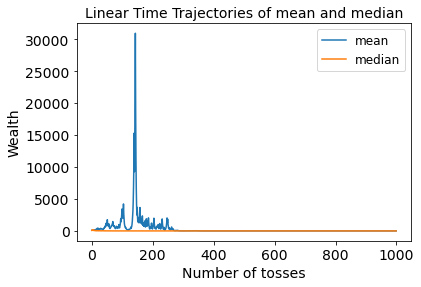

In [32]:
# linear scale
fig = plt.figure()
plt.plot(df_new.index, mean, label='mean')
plt.plot(df_new.index, median, label='median')
plt.title('Linear Time Trajectories of mean and median', fontsize=14)
plt.xlabel('Number of tosses', fontsize=14)
plt.ylabel('Wealth', fontsize=14)
plt.legend(loc='best',fontsize=12)
plt.show()

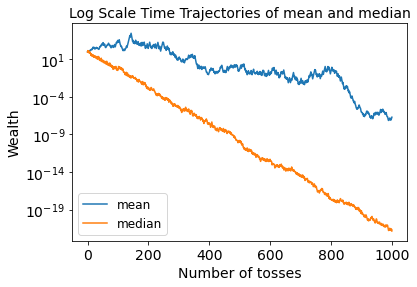

In [33]:
# log scale
fig = plt.figure()
plt.plot(df_new.index, mean, label='mean')
plt.plot(df_new.index, median, label='median')
plt.title('Log Scale Time Trajectories of mean and median', fontsize=14)
plt.xlabel('Number of tosses', fontsize=14)
plt.ylabel('Wealth', fontsize=14)
plt.yscale('log')
plt.legend(loc='best',fontsize=12)
plt.show()

From the linear time trajectories plot, there are a few people could some money within 200 tosses. The majority people would lose all of their initial wealth. However, the minor group with huge win dominates the mean value. And median value is better to measure the typical outcome of this game. The log scale time trajectories plot is better to reflect the trend of mean and median. The median value decreases dramatically, while the mean value fluctuates and decreases. Overall, the two plots convince us that nobody is able to win money after 1000 tosses. 


### 2.3.6 Repeat with N=10 and w=1000

In [34]:
df_rep = pd.DataFrame(np.random.rand(10,1000))
df_rep = df_rep.add_prefix('prob_')
df_rep

,prob_0,prob_1,prob_2,prob_3,prob_4,prob_5,prob_6,prob_7,prob_8,prob_9,...,prob_990,prob_991,prob_992,prob_993,prob_994,prob_995,prob_996,prob_997,prob_998,prob_999
0,0.759210,0.000540,0.238991,0.102943,0.704536,0.982567,0.424738,0.473229,0.240639,0.864602,...,0.516873,0.704366,0.672957,0.897358,0.887669,0.398021,0.519362,0.106755,0.092577,0.189736
1,0.083815,0.675197,0.270188,0.138399,0.153883,0.479092,0.023699,0.059713,0.109319,0.671576,...,0.983850,0.109821,0.765507,0.949496,0.132531,0.947178,0.227948,0.973004,0.155618,0.448533
2,0.534597,0.189431,0.674743,0.472968,0.126623,0.749549,0.338438,0.537507,0.337633,0.736201,...,0.286934,0.981111,0.462985,0.219800,0.139016,0.550985,0.699499,0.634502,0.047449,0.168152
3,0.249861,0.882208,0.903617,0.059689,0.213696,0.010758,0.985204,0.493902,0.533725,0.552158,...,0.812756,0.294330,0.205504,0.298666,0.001908,0.615378,0.470460,0.123484,0.617979,0.089458
4,0.477938,0.568472,0.946835,0.298654,0.167669,0.265044,0.386369,0.404358,0.960563,0.723473,...,0.994676,0.669107,0.804544,0.879292,0.764372,0.192394,0.506500,0.949843,0.963972,0.527464
5,0.110131,0.613871,0.703171,0.513788,0.363951,0.118950,0.004939,0.830385,0.059083,0.550155,...,0.395515,0.929143,0.311216,0.749014,0.254685,0.506484,0.193346,0.514770,0.987435,0.165526
6,0.546517,0.902508,0.450278,0.686044,0.481761,0.797190,0.099950,0.314985,0.831390,0.664890,...,0.994398,0.180290,0.335327,0.915345,0.173673,0.023104,0.768662,0.918602,0.225480,0.497416
7,0.881596,0.647382,0.951926,0.245673,0.495181,0.478955,0.297997,0.966586,0.638685,0.894041,...,0.798952,0.958091,0.028604,0.135593,0.863793,0.269876,0.548261,0.139904,0.559122,0.337876
8,0.278642,0.367479,0.927375,0.173082,0.350967,0.571626,0.773336,0.184006,0.837417,0.710805,...,0.373269,0.824195,0.855797,0.905470,0.552492,0.006742,0.833021,0.536405,0.292769,0.404634
9,0.564115,0.460176,0.522333,0.509700,0.530525,0.617193,0.352721,0.842825,0.460116,0.046461,...,0.445730,0.370602,0.303043,0.766396,0.589895,0.757843,0.689577,0.797828,0.853126,0.449618


In [35]:
# create wealth columns
for x in range(0,1000):
    df_rep['balance_'+str(x)] = 100 * np.ones(10)

In [36]:
# two-level loop
for x in range(0,1000):
    for i in range(1,10):
        if df_rep['prob_'+str(x)][i-1] >=0.5:   
            df_rep['balance_'+str(x)][i] = df_rep['balance_'+str(x)][i-1] + 50
        else: 
            df_rep['balance_'+str(x)][i] = df_rep['balance_'+str(x)][i-1] - 40

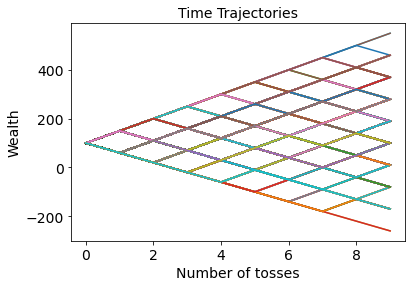

In [37]:
# plot time trajectories of wealth
fig = plt.figure()
for x in range(1000,2000):
    plt.plot(df_rep.index, df_rep.iloc[:,x].values)
plt.title('Time Trajectories', fontsize=14)
plt.xlabel('Number of tosses', fontsize=14)
plt.ylabel('Wealth', fontsize=14)
plt.show()

In [38]:
# plot time trajectories of mean and median of wealth
mean = []
median = []
for i in range(0,10): 
    mean.append(df_rep.iloc[i,1000:2000].values.mean())
    median.append(np.median(df_rep.iloc[i,1000:2000].values))

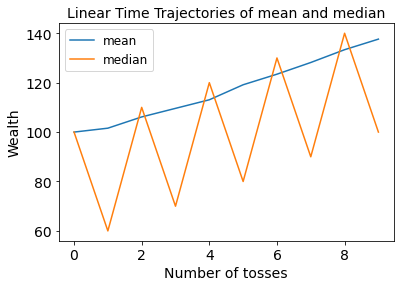

In [39]:
# linear scale
fig = plt.figure()
plt.plot(df_rep.index, mean, label='mean')
plt.plot(df_rep.index, median, label='median')
plt.title('Linear Time Trajectories of mean and median', fontsize=14)
plt.xlabel('Number of tosses', fontsize=14)
plt.ylabel('Wealth', fontsize=14)
plt.legend(loc='best',fontsize=12)
plt.show()

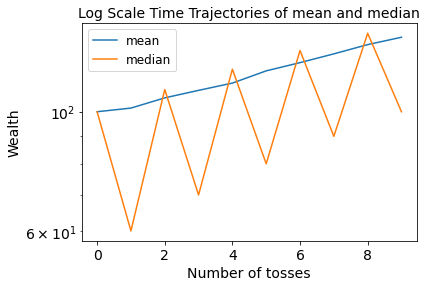

In [40]:
# log scale
fig = plt.figure()
plt.plot(df_rep.index, mean, label='mean')
plt.plot(df_rep.index, median, label='median')
plt.title('Log Scale Time Trajectories of mean and median', fontsize=14)
plt.xlabel('Number of tosses', fontsize=14)
plt.ylabel('Wealth', fontsize=14)
plt.yscale('log')
plt.legend(loc='best',fontsize=12)
plt.show()

In this new logic, the wealth will not change as dramatically as the previous logic. The winning rule is addition and subtraction, and the money gain (50 dollars) is higher than the money loss (40 dollars). Also, the outcome of the previous toss does not affect the next toss. Therefore, it is more likely for gamblers to make money. The linear time trajectories and log time trajectories are similar. The mean value linearly increases, and the median value fluctuates and increases. There is nobody would win a large amount of dollars, but more people would win some money. Therefore, mean value is better to describe the outcome of this game.